This notebook has been **launched just for you**. It provides an easy way to try out Stan.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**WARNING**</p>

<p>Don't rely on this server for anything you want to last - your notebook will be *deleted after 10 minutes of inactivity*.</p>
</div>

In [2]:
library(rstan)

Loading required package: Rcpp
Loading required package: inline

Attaching package: ‘inline’

The following object is masked from ‘package:Rcpp’:

    registerPlugin

rstan (Version 2.7.0-1, packaged: 2015-07-17 18:12:01 UTC, GitRev: 05c3d0058b6a)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


In [3]:
schools_code <- "
data {
  int<lower=0> J; // number of schools 
  real y[J]; // estimated treatment effects
  real<lower=0> sigma[J]; // s.e. of effect estimates 
}
parameters {
  real mu; 
  real<lower=0> tau;
  real eta[J];
}
transformed parameters {
  real theta[J];
  for (j in 1:J)
    theta[j] <- mu + tau * eta[j];
}
model {
  eta ~ normal(0, 1);
  y ~ normal(theta, sigma);
}
"
schools_dat <- list(J = 8, 
                    y = c(28,  8, -3,  7, -1,  1, 18, 12),
                    sigma = c(15, 10, 16, 11,  9, 11, 10, 18))

fit <- stan(model_code=schools_code, data = schools_dat, 
            iter = 1000, chains = 4)

COMPILING THE C++ CODE FOR MODEL 'schools_code' NOW.

SAMPLING FOR MODEL 'schools_code' NOW (CHAIN 1).

Chain 1, Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1, Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1, Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1, Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1, Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1, Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1, Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1, Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1, Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1, Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1, Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1, Iteration: 1000 / 1000 [100%]  (Sampling)
#  Elapsed Time: 0.015087 seconds (Warm-up)
#                0.015038 seconds (Sampling)
#                0.030125 seconds (Total)


SAMPLING FOR MODEL 'schools_code' NOW (CHAIN 2).

Chain 2, Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 2, Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 2, Iteration: 200 / 10

In [4]:
print(fit)

Inference for Stan model: schools_code.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

          mean se_mean   sd   2.5%   25%   50%   75% 97.5% n_eff Rhat
mu        7.89    0.16 4.97  -2.88  4.85  7.99 11.23 16.98   957    1
tau       6.75    0.21 5.63   0.22  2.49  5.39  9.58 22.53   752    1
eta[1]    0.39    0.02 0.91  -1.46 -0.19  0.40  0.99  2.20  1539    1
eta[2]    0.01    0.02 0.85  -1.69 -0.51  0.02  0.55  1.76  1652    1
eta[3]   -0.21    0.03 0.97  -2.07 -0.87 -0.22  0.43  1.80  1328    1
eta[4]   -0.02    0.02 0.89  -1.79 -0.60 -0.02  0.54  1.70  1314    1
eta[5]   -0.37    0.02 0.86  -1.97 -0.94 -0.40  0.18  1.45  1309    1
eta[6]   -0.20    0.02 0.89  -1.86 -0.83 -0.21  0.36  1.58  1439    1
eta[7]    0.32    0.02 0.89  -1.43 -0.26  0.34  0.93  2.02  1618    1
eta[8]    0.03    0.02 0.92  -1.78 -0.56  0.03  0.62  1.80  1661    1
theta[1] 11.54    0.25 8.49  -1.86  6.14 10.46 15.26 32.43  1129    1
thet

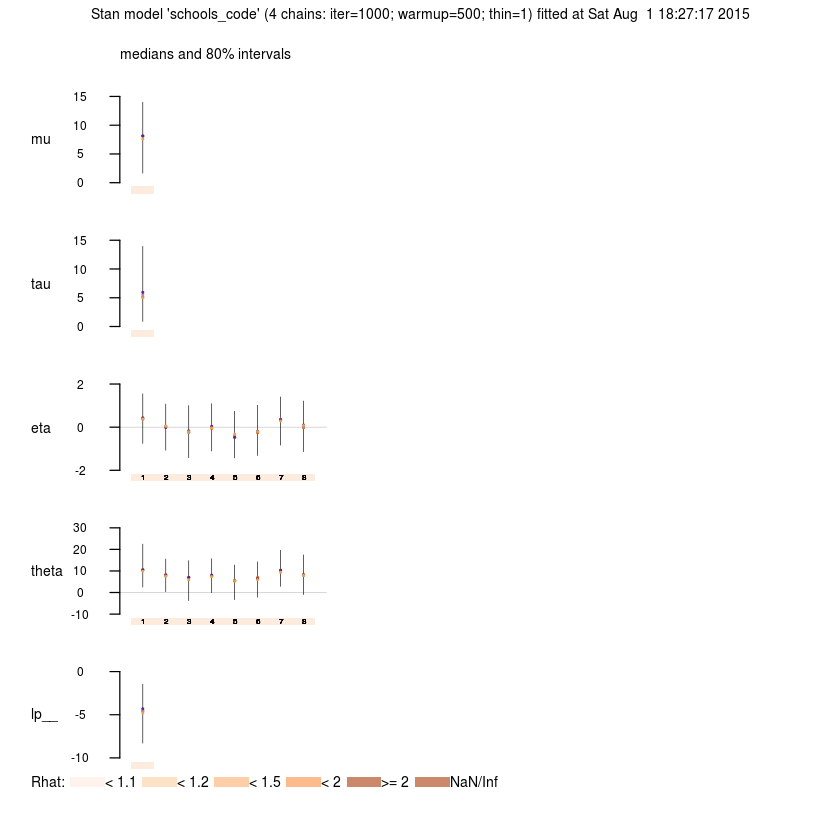

In [6]:
plot(fit)